# Enquête sur la science ouverte

Mariannig Le Béchec Aline Bouchard Philippe Charrier, Claire Denecker Gabriel Gallezot Stéphanie Rennes

Rapport : https://hal.archives-ouvertes.fr/hal-03545512v1

Réutilisation de données : https://zenodo.org/record/5827206


## Objectifs 

1. Rendre vivant des données
2. Refaire des traitements statistiques
3. Produire de nouvelles visualisations


Une question d'intérêt : l'usage déclaré de R & Python, analysé dans le rapport

## Chargement des données

Utiliser Matplotlib, Pandas et PySHS

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pyshs

Charger

In [4]:
data = pd.read_csv("../Data/SOSP_Export_base de données diffusable.csv")
data.head()

,Id,contexte_travail,fonction_recherche,statut_professionnel,statut_professionnel_Autre,annee_premiere_publi,Systeme_exploitation,Usage_telephone_mobile,Outils_gestion_travail_av_confinement_visioconférence,Outils_gestion_travail_av_confinement_planification_RDV,...,Souhait_partage_donnees_produites_discipline,Souhait_partage_donnees_produites_pays_continent,Souhait_partage_donnees_produites_domaine_economique,Souhait_partage_donnees_produites_secteur_associatif,Souhait_partage_donnees_produites_sans_restriction,compatibilite_diffusion_partage,evolutions_pratiques_numeriques,sexe,disciplines_9niv,annee_de_naissance-recod10niv
0,1,nous sommes entre 6 et 10 personnes,professeur / professeure des universités et as...,fonctionnaire ou assimilé,NaN,1995,Windows,rarement,parfois,souvent,...,oui,oui,oui,oui,oui,oui,je ne sais pas,un homme,Sciences humaines,61 à 65 ans
1,2,nous sommes plus de 50 personnes,ingénieur / ingénieure de recherche,en CDI,NaN,2005,Windows,rarement,parfois,parfois,...,oui,oui,oui,oui,oui,NaN,NaN,un homme,Médecine,46 à 50 ans
2,3,nous sommes entre 2 et 5 personnes,maître / maîtresse de conférences et assimilés,fonctionnaire ou assimilé,NaN,2006,Windows,parfois,rarement,souvent,...,oui,oui,oui,oui,oui,"oui, tout est dans la chronologie",non,un homme,Médecine,36 à 40 ans
3,4,nous sommes entre 2 et 5 personnes,"directeur / directrice de recherche (CNRS, INS...",fonctionnaire ou assimilé,NaN,1989,Windows;autres OS (Android...),souvent,rarement,souvent,...,oui,oui,non,non,non,Oui,Aucune idée,une femme,Médecine,56 à 60 ans
4,5,nous sommes entre 2 et 5 personnes,doctorant / doctorante (y compris CIFRE),en CDD,NaN,2015,MacOS,souvent,rarement,parfois,...,oui,oui,oui,oui,oui,Oui,Oui,une femme,Médecine,31 à 35 ans


Création d'un dictionnaire de questions

In [5]:
questions = pd.read_csv("../Data/SOSP_metadonnees_variables.csv")
questions = questions[31:]
dic_questions = dict(questions.set_index("Titre")["Listes des variables avec les questions et modalités associées"])

### Une fois qu'on a tout ça, on peut commencer à farfouiller dans les données

In [7]:
data["sexe"].value_counts()

un homme                       565
une femme                      480
je ne souhaite pas répondre     44
Name: sexe, dtype: int64

Avec l'identification de questions, de réflexions, etc.

Se concentrer sur un sous-ensembles de questions

- fonction_recherche
- statut_professionnel / statut_professionnel_Autre
- annee_premiere_publi
- Systeme_exploitation
- 'sexe'
- 'disciplines_9niv',
- 'annee_de_naissance-recod10niv'

-> Formuler une question de recherche : est-ce qu'il y a une dépendance disciplinaire au système d'exploitation ? Est-ce qu'il y a un usage différencié de R et de Python ?

### Usage de R & de Python

Se concentrer sur les champs explicites d'un logiciel :

- logiciel_production_donnees
- outils_nettoyage
- Outils_analyses
- Outils_visualisation

Faire une analyse des principales réponses et construire une heuristique de détection : facile pour Python ou Excel, difficile pour R...

(remarque en passant -> le nom des variables pourrait être mieux normalisé)

Opérations 

1. Regrouper les champs
2. Détecter la présence


In [8]:
# Définir les colonnes concernées
var = ["logiciel_production_donnees","outils_nettoyage","Outils_analyses","Outils_visualisation"]

#Regrouper toutes les informations dans un seul champ
data["outils"] = data.apply(lambda x : " ".join([x[i] for i in var if pd.notnull(x[i])]),axis=1)
data["outils"] = data["outils"].apply(lambda x : x if x!="" else None)

In [9]:
data["outils"]

0       Lime survey tableur pour les données statistiques
1                     excell word clean outil statistique
2                                                    JASP
3       Question peu claire.  Excel, SPSS, logiciels d...
4                            ? Excel r Image j dti studii
                              ...                        
1084               EpiInfo\nXlstat EpiInfo\nXlstat\nExcel
1085                                         Xpdf, Evince
1086                                   openrefine, talend
1087                                                 None
1088               R, Excel R, MPlus, Stata, SAS, Excel R
Name: outils, Length: 1089, dtype: object

Définition d'heuristiques de détection (à améliorer potentiellement) pour détecter la présence : c'est la cuisine...

In [10]:
data["outils_R"] = data["outils"].str.contains("R,| R|R |\nR|R | r | r,|,r ")
data["outils_Python"] = data["outils"].str.lower().str.contains("python")
data["outils_Excel"] = data["outils"].str.lower().str.contains("excel|exel")
data["outils_Word"] = data["outils"].str.lower().str.contains("word")
data["outils_Matlab"] = data["outils"].str.lower().str.contains("matlab")

Création d'un tableau exploratoire

In [12]:
pyshs.tri_a_plat(data,"outils_R")

,Effectif,Pourcentage (%)
False,815.0,75.0
True,272.0,25.0
Total,1087.0,100.0


In [16]:
100*data["outils_R"].value_counts()/len(data)

False    74.839302
True     24.977043
Name: outils_R, dtype: float64

In [21]:
outils = {
"Excel":pyshs.tri_a_plat(data,"outils_Excel"),
"R":pyshs.tri_a_plat(data,"outils_R"),
"Python":pyshs.tri_a_plat(data,"outils_Python"),
"Matlab":pyshs.tri_a_plat(data,"outils_Matlab"), 
         }
tab = pd.concat(outils,axis=1)
tab.to_excel("tableau.xls")
tab.to_latex()

/tmp/ipykernel_87010/1023979174.py:8: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  tab.to_excel("tableau.xls")


'\\begin{tabular}{lrrrrrrrr}\n\\toprule\n{} & \\multicolumn{2}{l}{Excel} & \\multicolumn{2}{l}{R} & \\multicolumn{2}{l}{Python} & \\multicolumn{2}{l}{Matlab} \\\\\n{} & Effectif & Pourcentage (\\%) & Effectif & Pourcentage (\\%) & Effectif & Pourcentage (\\%) & Effectif & Pourcentage (\\%) \\\\\n\\midrule\nFalse &    730.0 &            67.2 &    815.0 &            75.0 &    919.0 &            84.5 &    973.0 &            89.5 \\\\\nTrue  &    357.0 &            32.8 &    272.0 &            25.0 &    168.0 &            15.5 &    114.0 &            10.5 \\\\\nTotal &   1087.0 &           100.0 &   1087.0 &           100.0 &   1087.0 &           100.0 &   1087.0 &           100.0 \\\\\n\\bottomrule\n\\end{tabular}\n'

Visualisation intermédiaire

<AxesSubplot:title={'center':'Usage Excel'}>

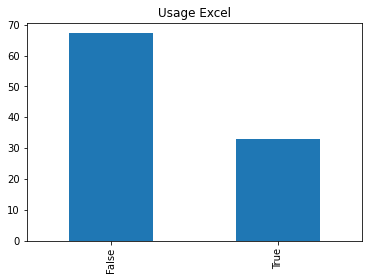

In [24]:
pyshs.tri_a_plat(data,"outils_Excel")["Pourcentage (%)"].drop("Total").plot(kind="bar",title="Usage Excel")

Tableau croisé

In [197]:
pd.crosstab(data["outils_Python"],data["disciplines_9niv"],normalize="columns",margins=True)

disciplines_9niv,"Chimie, Matériaux",Lettres et Arts,"Mathématiques, Informatiques",Médecine,"Physique, Sciences de la terre et de l'Univers",Science de l'ingénieur,Sciences du vivant,Sciences humaines,Sciences sociales,All
outils_Python,,,,,,,,,,
False,0.932203,0.931034,0.681159,0.888889,0.582524,0.648352,0.905797,0.948905,0.95,0.843721
True,0.067797,0.068966,0.318841,0.111111,0.417476,0.351648,0.094203,0.051095,0.05,0.156279


Création d'une visualisation

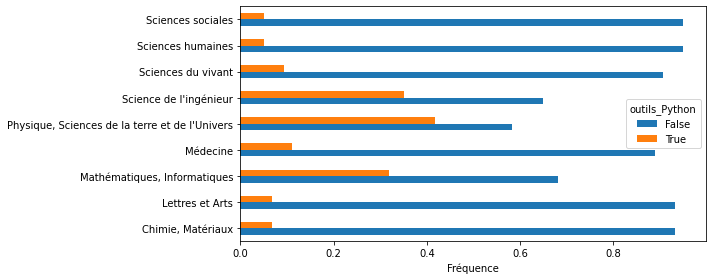

In [23]:
pd.crosstab(data["outils_Python"],data["disciplines_9niv"],normalize="columns").T.plot(kind="barh",figsize=(10,4))

# compléter et sauvegarder la figure
plt.ylabel("")
plt.xlabel("Fréquence")
plt.tight_layout()
plt.savefig("fig.png",dpi=300)

## Visualisation juxtaposée (un peu) finalisée

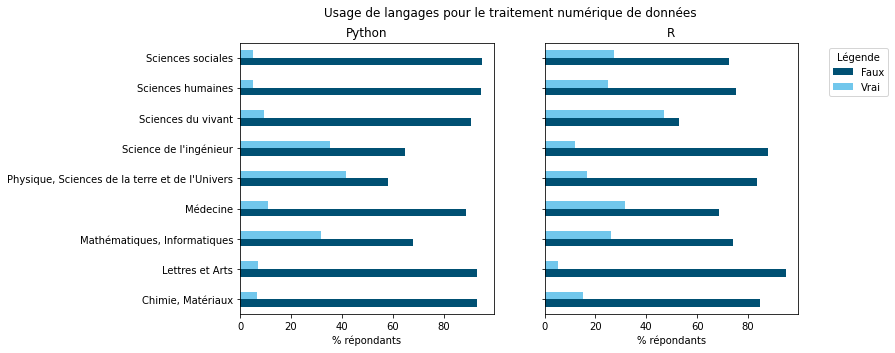

In [25]:
# Définition de la figure
fig,ax = plt.subplots(1,2,figsize=(10,5),sharey=True,sharex=True)

# Ajout des deux figures
(100*pd.crosstab(data["outils_Python"],data["disciplines_9niv"],normalize="columns")).T.plot(kind="barh",ax=ax[0],
                                                                                      legend=False,color=["#005073","#71c7ec"])
(100*pd.crosstab(data["outils_R"],data["disciplines_9niv"],normalize="columns")).T.plot(kind="barh",ax=ax[1],
                                                                                legend=False,color=["#005073","#71c7ec"])
# Diverses configurations de paramètres
plt.suptitle("Usage de langages pour le traitement numérique de données")
ax[0].set_ylabel("")
ax[0].set_xlabel("% répondants")
ax[1].set_xlabel("% répondants")
ax[0].set_title("Python")
ax[1].set_title("R")
plt.legend(title='Légende',labels=["Faux","Vrai"], bbox_to_anchor=(1.1, 1), loc='upper left')

# Sauvegarde
plt.savefig("fig.png",dpi=300,bbox_inches='tight')

### Modèle : régression logistique

Les facteurs qui pèsent sur l'usage de Python

In [25]:
# Création d'une variable indicatrice 0/1
data["outils_Python_B"] = data["outils_Python"].replace({True:1,False:0}).fillna(0)

In [204]:
# Mettre en forme les données
data["annee"] = data["annee_de_naissance-recod10niv"]

var_ind = {"sexe":"Genre","disciplines_9niv":"Discipline","annee":"Age"}

# Calculer le modèle
pyshs.regression_logistique(data,"outils_Python_B",var_ind)

Odds Ratio        p  \
Variable   Modalité                                                             
.Intercept                                                      0.09  0.001**   
Age        25 à 30 ans                                           ref            
           31 à 35 ans                                          0.87    0.717   
           36 à 40 ans                                          1.19      0.6   
           41 à 45 ans                                          0.67    0.249   
           46 à 50 ans                                          0.59    0.131   
           51 à 55 ans                                          0.46    0.051   
           56 à 60 ans                                          0.48    0.076   
           61 à 65 ans                                          0.14  0.004**   
           66 ans et plus                                       0.24    0.083   
           moins de 25 ans                                      1.01    0.986   
Discipline Chimie, Matériaux                                     ref            
           Lettres et Arts                                      1.14    0.857   
           Mathématiques, Informatiques                         7.17   0.0***   
           Médecine                                             1.73    0.424   
           Physique, Sciences de la terre et de l'Univers      12.39   0.0***   
           Science de l'ingénieur                                7.7   0.0***   
           Sciences du vivant                                   1.66    0.402   
           Sciences humaines                                    0.79    0.686   
           Sciences sociales                                    0.71    0.589   
Genre      je ne souhaite pas répondre                           ref            
           un homme                                             1.01    0.988   
           une femme                                            1.28    0.627   

                                                                       IC 95%  
Variable   Modalité                                                            
.Intercept                                                   0.09 [0.02-0.36]  
Age        25 à 30 ans                                                         
           31 à 35 ans                                       0.87 [0.42-1.81]  
           36 à 40 ans                                       1.19 [0.62-2.30]  
           41 à 45 ans                                       0.67 [0.34-1.32]  
           46 à 50 ans                                       0.59 [0.30-1.17]  
           51 à 55 ans                                       0.46 [0.21-1.00]  
           56 à 60 ans                                       0.48 [0.21-1.08]  
           61 à 65 ans                                       0.14 [0.04-0.54]  
           66 ans et plus                                    0.24 [0.05-1.20]  
           moins de 25 ans                                   1.01 [0.36-2.81]  
Discipline Chimie, Matériaux                                                   
           Lettres et Arts                                   1.14 [0.27-4.88]  
           Mathématiques, Informatiques                     7.17 [2.41-21.34]  
           Médecine                                          1.73 [0.45-6.60]  
           Physique, Sciences de la terre et de l'Univers  12.39 [4.09-37.55]  
           Science de l'ingénieur                           7.70 [2.52-23.51]  
           Sciences du vivant                                1.66 [0.51-5.37]  
           Sciences humaines                                 0.79 [0.25-2.51]  
           Sciences sociales                                 0.71 [0.20-2.47]  
Genre      je ne souhaite pas répondre                                         
           un homme                                          1.01 [0.37-2.71]  
           une femme                                         1.28 [0.48-3.43]

### Réaliser une analyse en composantes principales (ACM)

Création du tableau

In [183]:
X = data[["outils_R","outils_Excel","outils_Word","outils_Matlab","outils_Python"]]
X = X.replace({True:"Oui",False:"Non"}).fillna("Non")

Calcul de la MCA

In [184]:
import prince
mca = prince.MCA(n_components=2)
mca = mca.fit(X)

Calcul des coordonnées de variables supplémentaires

In [185]:
t = mca.row_coordinates(X)
t["dis"] = data["disciplines_9niv"]
disciplines = pd.concat({"X":t.groupby("dis")[0].mean(),"Y":t.groupby("dis")[1].mean()},axis=1)
disciplines

,X,Y
dis,,
"Chimie, Matériaux",-0.169824,0.011457
Lettres et Arts,-0.329660,-0.323810
"Mathématiques, Informatiques",0.305690,-0.111518
Médecine,0.019997,0.154328
"Physique, Sciences de la terre et de l'Univers",0.409072,-0.067208
Science de l'ingénieur,0.342121,0.024880
Sciences du vivant,-0.036041,0.271009
Sciences humaines,-0.191772,-0.021172
Sciences sociales,-0.176206,-0.009412


Représentation

Text(0.5, 1.0, 'ACM usage des outils R/Python/Excel/Matlab/Word dans le workflow')

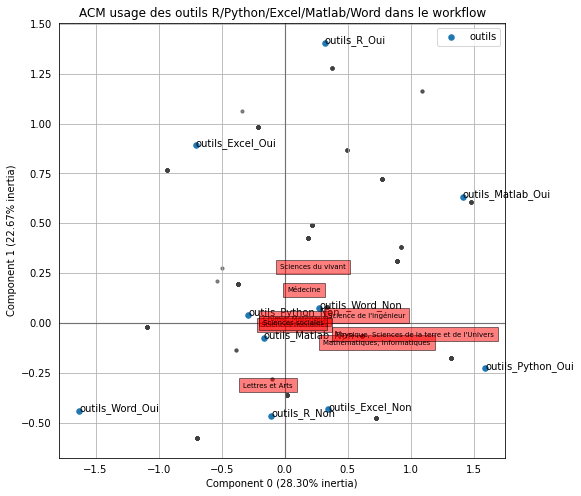

In [207]:
import matplotlib.pyplot as plt

#Fonction de Prince
ax = mca.plot_coordinates(X=X,figsize=(8, 8),
                             show_row_points=True,
                             row_points_size=10,
                             show_row_labels=False,
                             show_column_points=True,
                             column_points_size=30,
                             show_column_labels=True,
                             legend_n_cols=1)

# Ajout d'éléments
for i,j in disciplines.iterrows():
    ax.text(j["X"],j["Y"],i, fontsize=7, bbox={"facecolor":'red', "alpha":0.5})
    
plt.title("ACM usage des outils R/Python/Excel/Matlab/Word dans le workflow")